In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from mpl_toolkits.mplot3d import Axes3D
from skimage import io, color, feature
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap

In [2]:
NUM_IMAGES = 25000
IMAGE_SIZE = 100

In [3]:
def scatter(x, colors, output):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], c=colors.astype(np.int), lw=0, s=40)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.show()
    plt.savefig(output);

In [4]:
def pca_compare(data, labels, output):
    pca = PCA(n_components=2)
    projected2 = pca.fit_transform(data)

    pca = PCA(n_components=3)
    projected3 = pca.fit_transform(data)

    fig = plt.figure(figsize=plt.figaspect(2.))
    fig.suptitle('PCA Visualization')
    ax = fig.add_subplot(2, 1, 1)
    l = ax.scatter(projected2[:, 0], projected2[:, 1],
                c=labels, edgecolor='none', alpha=0.5)
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    
    ax = fig.add_subplot(2, 1, 2, projection='3d')
    ax.scatter(projected3[:, 0], projected3[:, 1], projected3[:, 2],
                    c=labels, edgecolor='none', alpha=0.5)
    plt.show()
    fig.savefig(output);

In [5]:
def pca_find_components(data, output):
    pca = PCA().fit(data)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.xlim(0, 200)
    plt.show()
    plt.savefig(output);

In [6]:
import matplotlib.image as mpimg
def im_comparison(pathname, data):
    os.chdir(pathname)
    files = glob.glob("*.jpg")
    idx = np.random.randint(0, len(files))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(np.reshape(data[np.random.randint(0, len(files)),:], \
                            (IMAGE_SIZE, IMAGE_SIZE)), cmap='gray')
    ax[0].set_title('processed image')
    
    ax[1].imshow(np.reshape(data[np.random.randint(0, len(files)),:], \
                            (IMAGE_SIZE, IMAGE_SIZE)), cmap='gray')
    ax[1].set_title('processed image')
    plt.show();

In [14]:
def hog_visual(data, output):
    idx = np.random.randint(0, len(data[0]))
    image = color.rgb2gray(np.reshape(data[idx,:], (IMAGE_SIZE, IMAGE_SIZE)))
    hog_vec, hog_vis = feature.hog(image, visualise=True)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('input image')

    ax[1].imshow(hog_vis, cmap='gray')
    ax[1].set_title('visualization of HOG features')
    plt.show()
    fig.savefig(output);

In [9]:
# import data
data = np.load(open('/home/smannan/finalproject/data/training_im_100x100.npy','rb')) \
    .reshape(NUM_IMAGES, IMAGE_SIZE*IMAGE_SIZE)
labels = np.load(open('/home/smannan/finalproject/data/training_labels_100x100.npy','rb'))
hog = np.load(open('/home/smannan/finalproject/data/training_hog_100x100.npy','rb'))

In [10]:
assert data.shape[0] == NUM_IMAGES
assert data.shape[1] == IMAGE_SIZE * IMAGE_SIZE
assert labels.shape[0] == NUM_IMAGES
assert hog.shape[0] == NUM_IMAGES

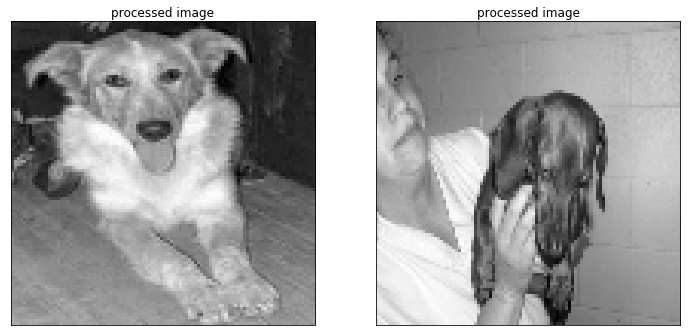

In [11]:
im_comparison('/data/smannan/train/train/dog/', data)

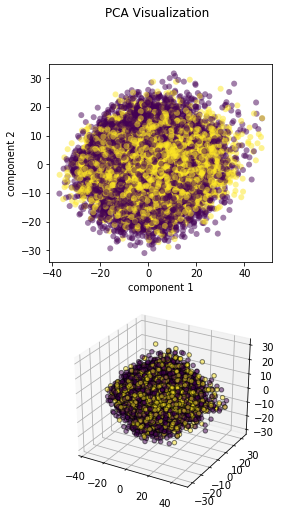

In [15]:
pca_compare(data, labels, '/home/smannan/finalproject/output/pca.png')

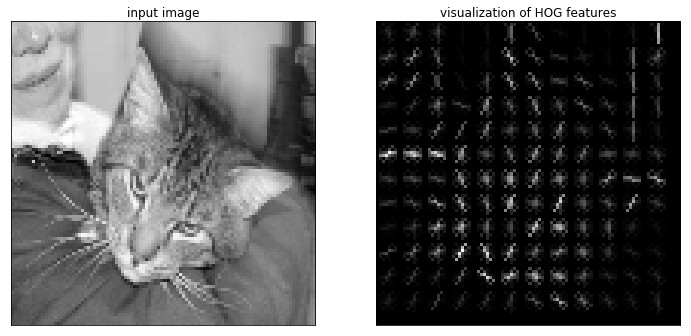

In [16]:
hog_visual(data, '/home/smannan/finalproject/output/hog_visual.png')

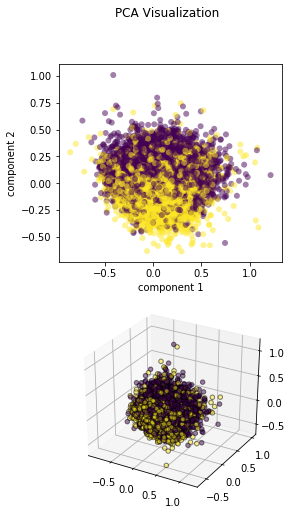

In [17]:
pca_compare(hog, labels, '/home/smannan/finalproject/output/hog_pca.png')